The project consists of three classes: the track; the Umpire and the Agent.


The track class has three variables: three different tracks defined as 2D character arrays. The first track mirrors the second proposed track in the problem statement, the second track is similar to the first track but has one obstacle within the race track; and the third track has two obstacles in it.


The Umpire class defines the rules that govern the agents race and takes two arguments: and instance of the track class and an  integer number in [0,3] that specifies the which of the three tracks is used in an episode


Agent class defines the structure of the agent using On-policy first-visit MC control for ε-greedy policy. This class takes three arguments: an instance of the Umpire class, a value for epsilon and an initial value for the state-action pairs.


The notebook’s cells should be run in sequential order and the parameters such as epsilon; number of episodes, track number can be adjusted accordingly. The output of the entire program is a cmap of the paths taken by the agent and plot of the returns vs episodes

In [ ]:
# Data structures packages
import numpy as np
import pandas as pd
import random
from tqdm import tqdm


# Plotting Packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

In [ ]:
# Define Race Tracks


In [ ]:
class Racecourse:

    RACE_TRACK = np.array([

                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','B','B','B','B','B','B','B','B','B']
              ])

    #Race track with one obstruction
    RACE_TRACK_OBS_1 = np.array([

                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','B','B','B','B','B','B','B','B','B']
              ])

    # Race Track with two obstructtions
    RACE_TRACK_OBS_2 = np.array([

                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','B','B','B','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','B','B','B','t','t','t','t','t','F'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','B','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','B','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','B','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','B','t','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','B','t','t','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','B','t','t','t','t','t','t','t','t','B','B','B','B','B','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['B','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','t','B','B','B','B','B','B','B','B','B'],
                ['S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','S','B','B','B','B','B','B','B','B','B']
              ])




In [ ]:
# Define race track rules

In [ ]:
class Umpire:

    # Constants
    TRACK_REWARD = -1
    RAND_VEL_CHANGE_PROBABILITY = 0.1

    RACE_TRACK_VALUE = 't'
    BOUNDS_VALUE = 'B'
    START_VALUE = 'S'
    END_VALUE = 'F'
    AGENT_VALUE = 'A'

    def __init__(self, track, track_num):

        #initialize race
        if track_num == 0:
            self.racetrack = track.RACE_TRACK
        elif track_num == 1:
            self.racetrack = track.RACE_TRACK_OBS_1
        else:
            self.racetrack = track.RACE_TRACK_OBS_2


        self.start_coordinates = self.start_positions()

        self.position = (0,0)
        self.velocity = (0,0)
        self.finished = False
        self.reset_agent_state()


    # Get possible start locations
    def start_positions(self):

        start_coor = []
        x_coordinates, y_coordinates = np.where(self.racetrack == self.START_VALUE)

        for x, y in zip(x_coordinates, y_coordinates):

            start_coor.append((x, y))

        return start_coor


    # Move agent according to velocity
    def update_position(self, velocity):

        self.position = (self.position[0] - velocity[0], self.position[1] + velocity[1])


    # ensure agent is not out-of-bounds; return true if so, else false
    def check_out_of_bounds(self):

        boundry = self.position[0] < 0 or self.position[0] >= self.racetrack.shape[0] or \
        self.position[1] < 0 or self.position[1] >= self.racetrack.shape[1]

        if boundry:
            return True
        elif self.racetrack[self.position] == self.BOUNDS_VALUE:
            return True
        else:
            return False



    # Take agent to any start location and reset agent's velocity
    def reset_agent_state(self):

        self.position = random.choice(self.start_coordinates)
        self.velocity = (0, 0)
        self.finished = False


    # Return the state of the agent
    def get_agent_state(self):

        return (self.position[0], self.position[1], self.velocity[0], self.velocity[1])

    # Check if agent has reached one of the end locations Return true if so, else return False
    def check_finish(self):

        if self.check_out_of_bounds():
            self.reset_agent_state()

        if self.racetrack[self.position] == self.END_VALUE:
            return True
        else:
            return False

    # Ensure x,y velocity values are not above 4 or below 0, and never both 0
    def velocity_restriction(self):

        # Make sure the velocity is not 0
        if self.velocity == (0, 0):
            if random.choice([True, False]):
                self.velocity = (1, 0)
            else:
                self.velocity = (0, 1)

        # Check x velocity component
        if self.velocity[0] < 0:
            self.velocity = (0, self.velocity[1])
        elif self.velocity[0] > 4:
            self.velocity = (4, self.velocity[1])

        # Check y velocity component
        if self.velocity[1] < 0:
            self.velocity = (self.velocity[0], 0)
        elif self.velocity[1] > 4:
            self.velocity = (self.velocity[0], 4)


    # Move Agent according to x and y acceleration values
    def move_agent(self, x_vel_change, y_vel_change):


        assert not self.finished

        # Restrict change in velocity
        if x_vel_change < -1 or x_vel_change > 1:
            raise IOError('Invalid x velocity change')

        if y_vel_change < -1 or y_vel_change > 1:
            raise IOError('Invalid y velocity change')

        # Update velocity

        # Randomly change velocity change to zero
        if np.random.uniform(0, 1) < self.RAND_VEL_CHANGE_PROBABILITY:
            x_vel_change = 0
            y_vel_change = 0

        self.velocity = (self.velocity[0] + x_vel_change, self.velocity[1] + y_vel_change)
        self.velocity_restriction()

        #
        last_position = self.position
        self.update_position(self.velocity)

        # Check if finished
        if self.check_finish():
            self.finished = True
            print("Agent has finished the race!")
            return self.TRACK_REWARD

        # Check for invalid position
        invalid_position = False

        if self.check_out_of_bounds():
            invalid_position = True
            self.reset_agent_state()

        # Check if finished again
        if self.check_finish():
            self.finished = True

            if invalid_position:
                self.reset_agent_state()
            else:
                return self.TRACK_REWARD

        if invalid_position:
            self.reset_agent_state()
        else:
            return self.TRACK_REWARD



In [ ]:
# Define agent's learning Algorithm

In [ ]:
class Agent:

    ACTIONS_DIM = 9
    MAX_VELOCITY = 5
    ACTIONS = [[1, 1], [0, 1], [1, 0], [0, 0], [-1, 0], [0, -1], [1, -1], [-1, 1], [-1, -1]]

    # Initialize agent
    def __init__(self, ump, epsilon, init):
        self.ump = ump
        self.epsilon = epsilon
        self.init = init

        self.state_action_values = None
        self.state_action_counts = None
        self.policy = None
        self.reset()


    # Run episode and
    def run_episode(self):

        sequence = []

        while not self.ump.finished:

            state = self.ump.get_agent_state()

            action = self.epsilon_explore(self.policy[state])

            reward = self.ump.move_agent(*self.action_to_acceleration(action))

            sequence.append((state, action, reward))

        returns = np.zeros(len(sequence))

        for i in reversed(range(0, len(sequence))):
            for j in range(0, i + 1):
                returns[j] += sequence[i][2]

        for i in range(0, len(sequence)):

            state = sequence[i][0]
            action = sequence[i][1]
            state_action = state + (action,)
            ret = returns[i]

            self.state_action_values[state_action] += self.new_mean(ret, state_action)
            self.state_action_counts[state_action] += 1

        return returns[0], sequence

    # Create array of zeros for policy, state-action values and state-action counts
    def reset(self):

        self.state_action_values = np.zeros((self.ump.racetrack.shape[0], self.ump.racetrack.shape[1],
                                             self.MAX_VELOCITY, self.MAX_VELOCITY, self.ACTIONS_DIM), dtype=np.float32) - self.init

        self.state_action_counts = np.zeros((self.ump.racetrack.shape[0], self.ump.racetrack.shape[1],
                                       self.MAX_VELOCITY, self.MAX_VELOCITY, self.ACTIONS_DIM),dtype=np.int32)

        self.policy = np.zeros((self.ump.racetrack.shape[0], self.ump.racetrack.shape[1],
                                self.MAX_VELOCITY, self.MAX_VELOCITY),dtype=np.int32)


    # select actions with maximum average returns for each state
    def update_policy(self):

        self.policy = np.argmax(self.state_action_values, axis=-1)


    # Selected one of the 9 possible acceleration values
    def action_to_acceleration(self, action_index):

        return self.ACTIONS[action_index]


    # Choose random action with a probability of self.epsilon
    def epsilon_explore(self, action):

        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, self.ACTIONS_DIM)
        else:
            return action


    # update average of returns on state-actions
    def new_mean(self, new_value, state_action):

        return (new_value - self.state_action_values[state_action]) / (self.state_action_counts[state_action] + 1)


    # Display the actions the agent took on the track
    def show_agent_sequence(self, sequence):

        # Convert possible track values to distinct integers for cmap
        START_VALUE = ord('S')%7
        END_VALUE = ord('F')%7
        TRACK_VALUE = ord('t')%7
        BOUNDS_VALUE = ord('B')%7
        AGENT_VALUE = ord('A')%7

        track = self.ump.racetrack.copy()

        #
        for item in sequence:
            state = item[0]
            track[state[0], state[1]] = 'A'

        track = track.tolist()

        # convert track characters to ascii and then to distinct integers
        for i in range(0,len(track)):
            for j in range(0, len(track[0])):
                track[i][j] = ord(track[i][j])%7

        track = np.array(track)

        im = plt.imshow(track)

        plt.axis("off")

        values = np.unique(track.ravel())
        labels = {
          START_VALUE: "Start",
          END_VALUE: "Finish",
          TRACK_VALUE: "Track",
          BOUNDS_VALUE: "Boundry",
          AGENT_VALUE: "Agent"
        }
        colors = [im.cmap(im.norm(value)) for value in values]
        patches = [mpatches.Patch(color=colors[i], label=labels[values[i]]) for i in range(len(values))]
        plt.legend(handles=patches, loc=4)

        plt.show()



In [ ]:
# run episodes and print out sequence of agent actions in cmap

episodes = 10000

track = Racecourse() # instance of track used by agent
race = Umpire(track,0) # instance of umpire class used by agent
monteCarlor = Agent(race, 0.6, -100) # instance of Agent


Returns = []
num_agent_actions = []
for i in range(episodes):
    a,s = monteCarlor.run_episode()
    Returns.append(a)
    monteCarlor.update_policy()
    race.reset_agent_state()

monteCarlor.show_agent_sequence(s)

Text(0, 0.5, 'Return')

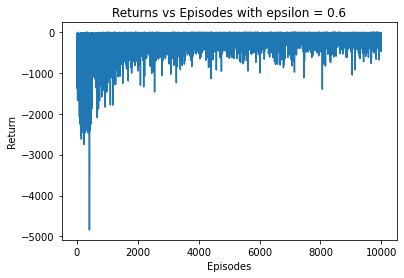

In [ ]:
# plot reward vs episode

Returns
ep = list(range(episodes))

plt.plot(ep,Returns)
plt.title('Returns vs Episodes with epsilon = 0.6')
plt.xlabel('Episodes')
plt.ylabel('Return')

